For Train :
MAE: 2.52
MSE: 12.45
RMSE: 3.53
R-squared: 0.1905

For test:
MAE: 2.45
MSE: 10.86
RMSE: 3.29
R-squared: 0.232


For Train :
MAE: 2.52
MSE: 12.45
RMSE: 3.53
R-squared: 0.1905

For test:
MAE: 2.45
MSE: 10.86
RMSE: 3.29
R-squared: 0.232


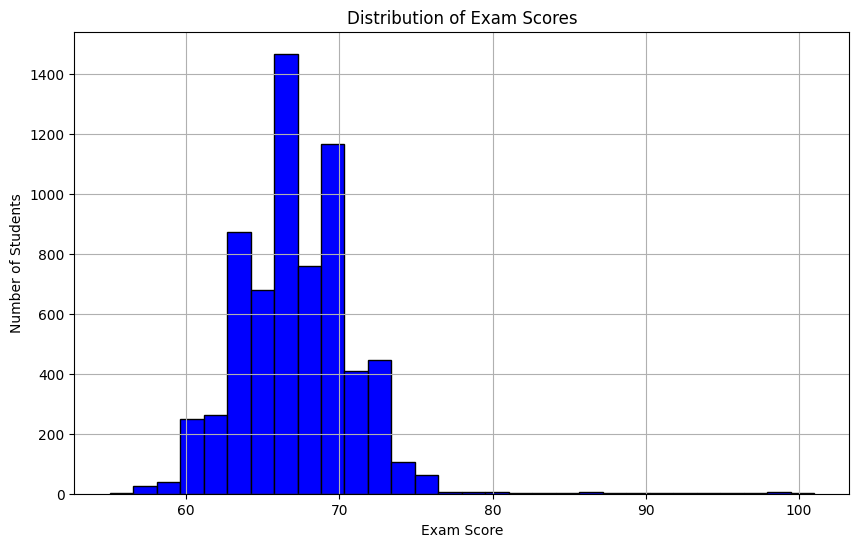

For Train :
MAE: 2.52
MSE: 12.45
RMSE: 3.53
R-squared: 0.1905

For test:
MAE: 2.45
MSE: 10.86
RMSE: 3.29
R-squared: 0.232


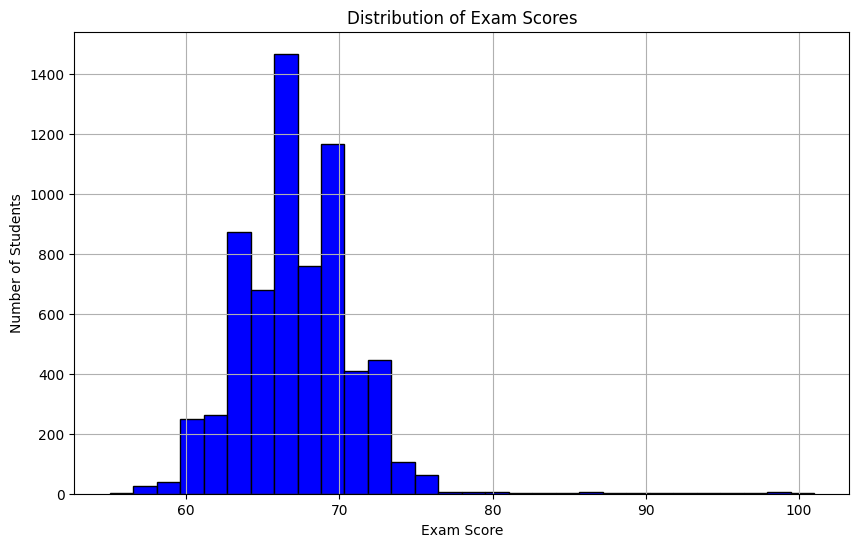

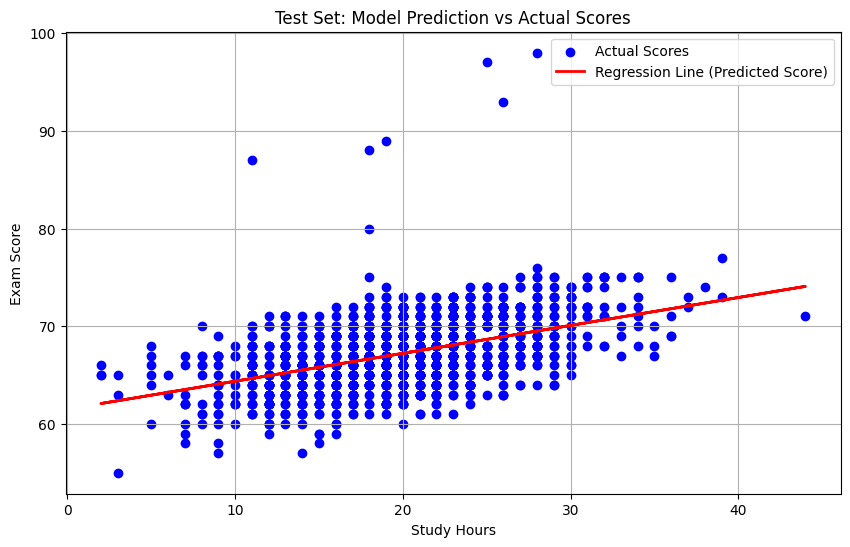

Predicted Exam Score for 8 hours of study: [63.79651742] 


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('StudentPerformanceFactors.csv')
X = data[['Hours_Studied']]
Y = data['Exam_Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on train and test sets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Evaluate performance
print("For Train :")
print("MAE:", round(mean_absolute_error(Y_train, train_pred), 2))
print("MSE:", round(mean_squared_error(Y_train, train_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(Y_train, train_pred)), 2))
print("R-squared:", round(r2_score(Y_train, train_pred), 4))

print("\nFor test:")
print("MAE:", round(mean_absolute_error(Y_test, test_pred), 2))
print("MSE:", round(mean_squared_error(Y_test, test_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(Y_test, test_pred)), 2))
print("R-squared:", round(r2_score(Y_test, test_pred), 4))

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Exam_Score'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

# Scatter plot and regression line (using test set)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Scores')
plt.plot(X_test, test_pred, color='red', linewidth=2, label='Regression Line (Predicted Score)')
plt.title('Test Set: Model Prediction vs Actual Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.legend()
plt.show()

new_hour = 8
new_score = model.predict([[new_hour]])
print(f"Predicted Exam Score for {new_hour} hours of study: {new_score} ")